In [31]:
import numpy as np
import os

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from Data.Dataset import LatentFMRIDataset
import matplotlib.pyplot as plt
from einops import rearrange

In [3]:
data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_UM1_merged'
test_ratio = 0.15
dataset = LatentFMRIDataset(data_dir=data_directory)
all_data_items = dataset.get_all_items()
X = all_data_items['X']
y = all_data_items['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45198, 4, 16, 18), (45198,), (7977, 4, 16, 18), (7977,))

[LibSVM]...............
*..............*
optimization finished, #iter = 29715
obj = -287.725460, rho = -0.960808
nSV = 665, nBSV = 384
Total nSV = 665


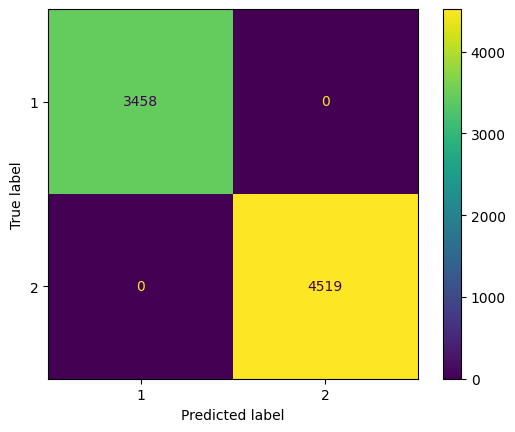

In [12]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

model = SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=42, verbose=True)
clf = model.fit(X=X_train, y=y_train)

test_predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, test_predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()

tn, fp, fn, tp = cm.ravel()
metrics = {
    'accuracy': ((tp + tn) / (tp + tn + fp + fn + 1e-6)),
    'recall': (tp / (tp + fn + 1e-6)),
    'precision': (tp / (tp + fp + 1e-6))
}

In [19]:
model.coef_.shape, clf.support_vectors_.shape

((1, 1152), (665, 1152))

# Support vectors

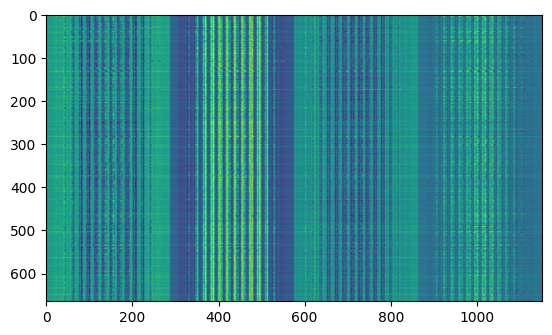

In [66]:
plt.imshow(clf.support_vectors_) # shape: num_support_vectors x num_features

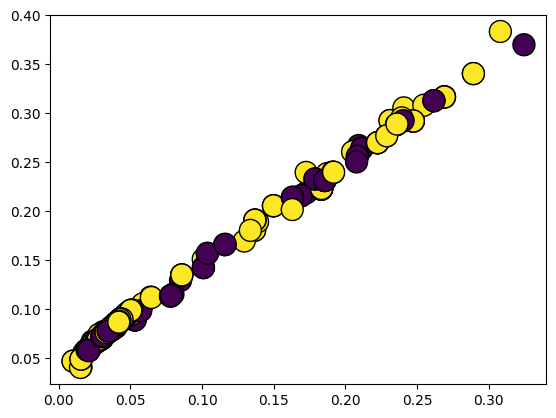

In [67]:
plt.scatter(
    clf.support_vectors_[0:665, 0],
    clf.support_vectors_[0:665, 1],
    c=y_train[0:665],
    s=250,
    facecolors="none",
    edgecolors="k",
)

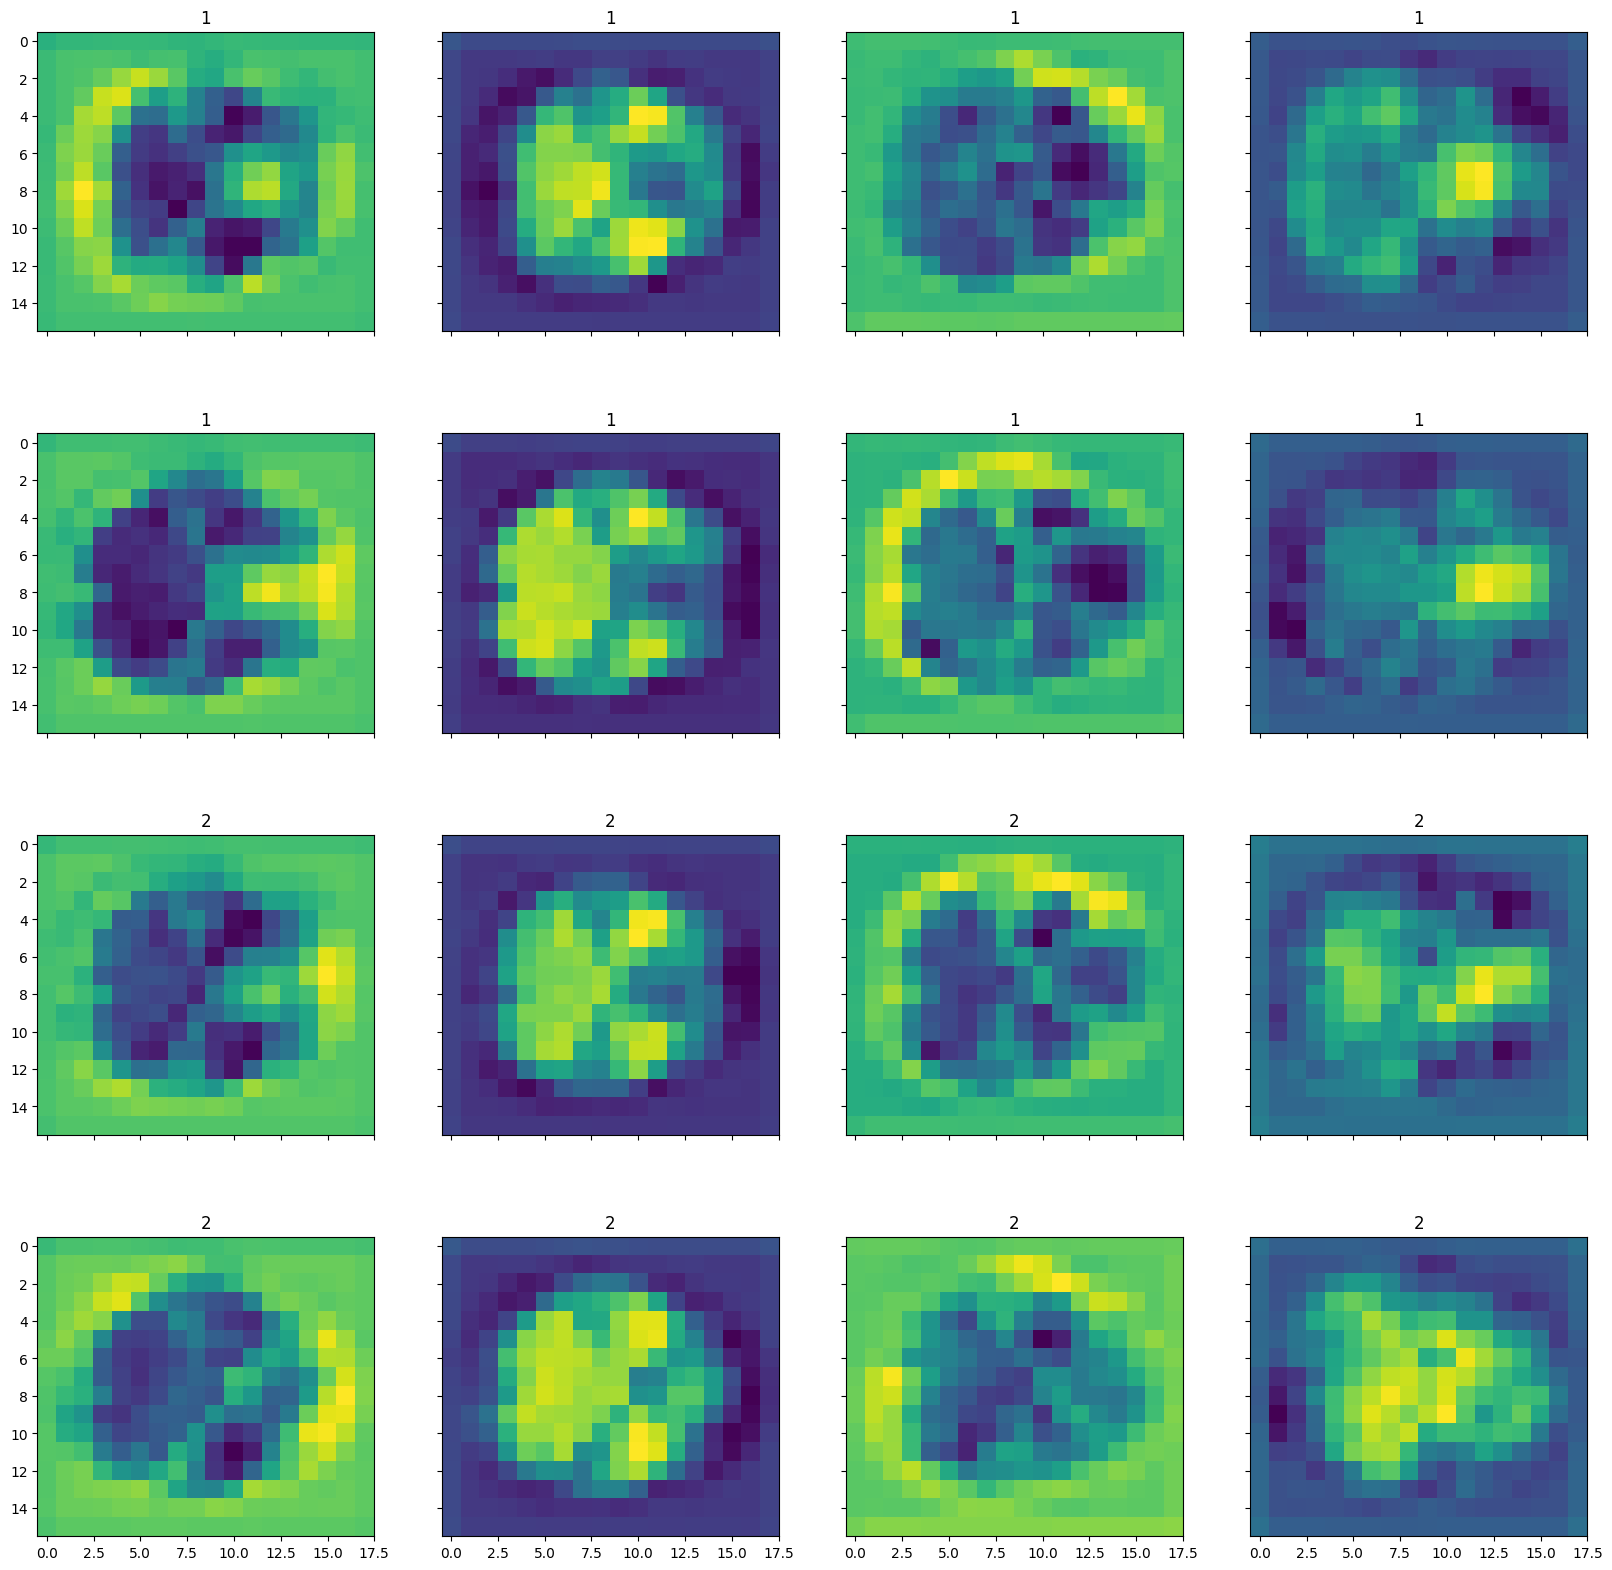

In [68]:
labels_for_support_vectors = clf.predict(clf.support_vectors_)
support_1 = clf.support_vectors_[labels_for_support_vectors == 1]
support_2 = clf.support_vectors_[labels_for_support_vectors == 2]

num_support_vectors_to_visualize = 2
support_vectors = np.concatenate((support_1[0:num_support_vectors_to_visualize], support_2[0:num_support_vectors_to_visualize]))

support_vectors = rearrange(support_vectors, "n (x y z) -> n x y z", x=4, y=16, z=18)
f, axarr = plt.subplots(2*num_support_vectors_to_visualize, 4, figsize=(20, 20), sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
for support_vector_index in range(2*num_support_vectors_to_visualize):
    axarr[support_vector_index, 0].imshow(support_vectors[support_vector_index, 0])
    axarr[support_vector_index, 1].imshow(support_vectors[support_vector_index, 1])
    axarr[support_vector_index, 2].imshow(support_vectors[support_vector_index, 2])
    axarr[support_vector_index, 3].imshow(support_vectors[support_vector_index, 3])
    axarr[support_vector_index, 0].set_title('1' if support_vector_index < num_support_vectors_to_visualize else '2')
    axarr[support_vector_index, 1].set_title('1' if support_vector_index < num_support_vectors_to_visualize else '2')
    axarr[support_vector_index, 2].set_title('1' if support_vector_index < num_support_vectors_to_visualize else '2')
    axarr[support_vector_index, 3].set_title('1' if support_vector_index < num_support_vectors_to_visualize else '2')

plt.show()

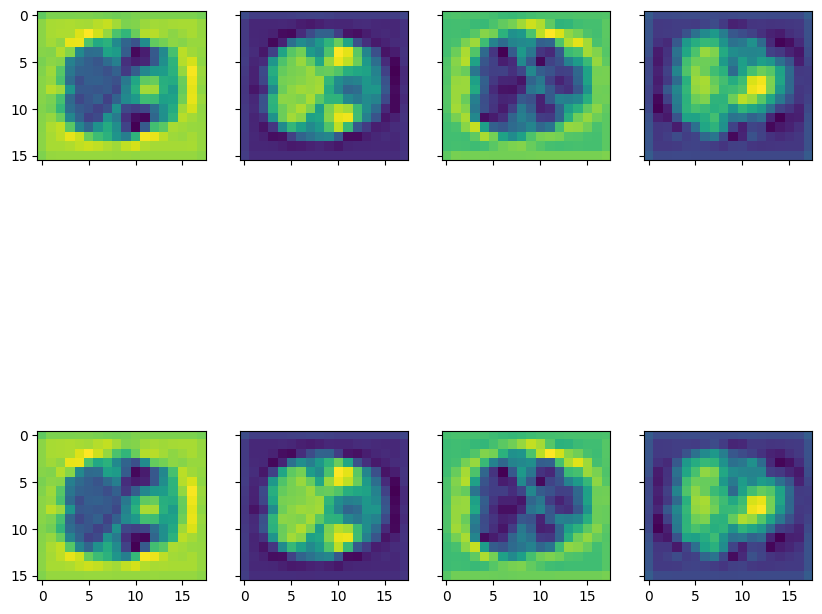

In [80]:
support_vector_1_avg = rearrange(np.mean(support_1, axis=0), "(a b c) -> a b c", a=4, b=16, c=18)
support_vector_2_avg = rearrange(np.mean(support_2, axis=0), "(a b c) -> a b c", a=4, b=16, c=18)

f, axarr = plt.subplots(2, 4, figsize=(10, 10), sharex=True, sharey=True)
axarr[0, 0].imshow(support_vector_1_avg[0])
axarr[0, 1].imshow(support_vector_1_avg[1])
axarr[0, 2].imshow(support_vector_1_avg[2])
axarr[0, 3].imshow(support_vector_1_avg[3])
axarr[1, 0].imshow(support_vector_2_avg[0])
axarr[1, 1].imshow(support_vector_2_avg[1])
axarr[1, 2].imshow(support_vector_2_avg[2])
axarr[1, 3].imshow(support_vector_2_avg[3])

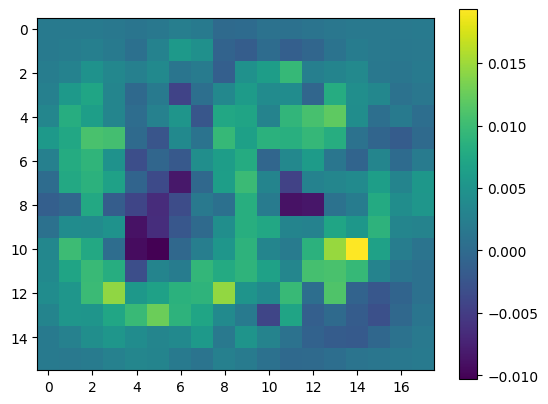

In [87]:
plt.imshow((support_vector_1_avg - support_vector_2_avg)[3])
plt.colorbar()